In [1]:
# import necessary modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
china = pd.read_csv('../data/China_Filtered.csv')
china.drop(columns=['Indicator Code', 'Indicator Code.1'], inplace=True)
china.set_index('Indicator Name', inplace=True)

In [3]:
china.shape

(84, 58)

In [4]:
china_by_time = china.T
china_by_time.head()

Indicator Name,Households and NPISHs Final consumption expenditure (current US$),General government final consumption expenditure (% of GDP),General government final consumption expenditure (current US$),Military expenditure (% of central government expenditure),Military expenditure (% of GDP),Military expenditure (current USD),"Imports of goods, services and primary income (BoP, current US$)","Imports of goods and services (BoP, current US$)",Trade in services (% of GDP),"Trademark applications, total","Patent applications, residents","Patent applications, nonresidents","Population, total",Population growth (annual %),Population ages 65 and above (% of total),"Population ages 65 and above, total",Interest payments on external debt (% of GNI),"Interest payments on external debt, total (INT, current US$)","External debt stocks, short-term (DOD, current US$)","External debt stocks, public and publicly guaranteed (PPG) (DOD, current US$)","Death rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Mortality rate, adult, male (per 1,000 male adults)","Mortality rate, adult, female (per 1,000 female adults)",Gross savings (% of GDP),Gross savings (% of GNI),Gross savings (current US$),Real interest rate (%),"Inflation, consumer prices (annual %)",Consumer price index (2010 = 100),"Use of IMF credit (DOD, current US$)",External debt stocks (% of GNI),"External debt stocks (% of exports of goods, services and primary income)",Total change in external debt stocks (current US$),"External debt stocks, total (DOD, current US$)","Unemployment, total (% of total labor force) (national estimate)","GNI per capita, Atlas method (current US$)",GNI (current US$),"GNI, Atlas method (current US$)",Gross domestic savings (% of GDP),Gross domestic savings (current US$),GDP per capita growth (annual %),GDP per capita (current US$),GDP growth (annual %),GDP (current US$),Trade (% of GDP),External balance on goods and services (% of GDP),External balance on goods and services (current LCU),External balance on goods and services (current US$),Imports of goods and services (% of GDP),Imports of goods and services (current LCU),Imports of goods and services (current US$),Gross capital formation (% of GDP),Gross fixed capital formation (% of GDP),Gross fixed capital formation (current US$),Exports of goods and services (% of GDP),Exports of goods and services (current US$),Gross national expenditure (% of GDP),Gross national expenditure (current US$),Final consumption expenditure (% of GDP),Final consumption expenditure (current US$),Households and NPISHs final consumption expenditure (% of GDP),Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)","Stocks traded, turnover ratio of domestic shares (%)","Stocks traded, total value (% of GDP)","Stocks traded, total value (current US$)","Listed domestic companies, total",Market capitalization of listed domestic companies (% of GDP),Market capitalization of listed domestic companies (current US$),S&P Global Equity Indices (annual % change),"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net inflows (BoP, current US$)","Exports of goods, services and primary income (BoP, current US$)","Exports of goods and services (BoP, current US$)","Net capital account (BoP, current US$)","Portfolio investment, net (BoP, current US$)","Foreign direct investment, net (BoP, current US$)","Net trade in goods (BoP, current US$)","Net trade in goods and services (BoP, current US$)","Net primary income (BoP, current US$)","Net financial account (BoP, current US$)",Current account balance (% of GDP),"Current account balance (BoP, current US$)"
1960,3.012836e+10,12.985511,7.754489e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,667070000.0,1.832868,3.703864,24707366.0,NaN,NaN,NaN,NaN,25.43,20.86,499.659,397.316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.971647e+10,NaN,36.562139,2.183362e+10,NaN,89.520542,NaN,5.971647e+10,8.734100

In [5]:
china_by_time.describe().T

,count,mean,std,min,25%,50%,75%,max
Indicator Name,,,,,,,,
Households and NPISHs Final consumption expenditure (current US$),58.0,7.704423e+11,1.250569e+12,3.012836e+10,7.270526e+10,1.675439e+11,7.040830e+11,4.697723e+12
General government final consumption expenditure (% of GDP),58.0,1.341032e+01,1.211414e+00,1.082377e+01,1.276573e+01,1.337509e+01,1.398972e+01,1.663335e+01
General government final consumption expenditure (current US$),58.0,2.712611e+11,4.590358e+11,5.971241e+09,1.791655e+10,4.477468e+10,2.401219e+11,1.745036e+12
Military expenditure (% of central government expenditure),29.0,1.102787e+01,3.433821e+00,6.033785e+00,7.642045e+00,1.163016e+01,1.396720e+01,1.711013e+01
Military expenditure (% of GDP),29.0,1.983876e+00,2.301917e-01,1.674802e+00,1.872334e+00,1.922053e+00,2.067426e+00,2.493258e+00
Military expenditure (current USD),29.0,7.303770e+10,7.452077e+10,9.953642e+09,1.456324e+10,3.512631e+10,1.157118e+11,2.282307e+11
"Imports of goods, services and primary income (BoP, current US$)",36.0,7.097368e+11,8.771512e+11,1.954100e+10,5.648575e+10,1.811321e+11,1.167205e+12,2.503962e+12
"Imports of goods and services (BoP, current US$)",36.0,6.393437e+11,7.838759e+11,1.890000e+10,5.391025e+10,1.576464e+11,1.058816e+12,2.241603e+12
Trade in services (% of GDP),36.0,5.516440e+00,2.446178e+00,1.802655e+00,2.878647e+00,5.724271e+00,7.088072e+00,1.012743e+01


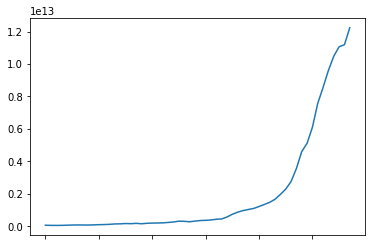

In [6]:
china_by_time['GDP (current US$)'].plot()

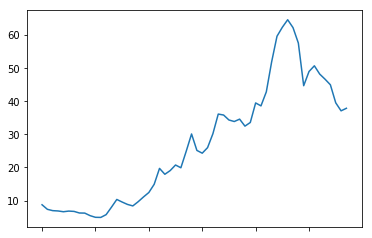

In [7]:
china_by_time['Trade (% of GDP)'].plot()

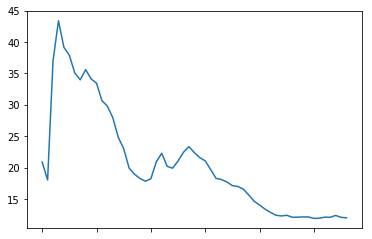

In [8]:
china_by_time['Birth rate, crude (per 1,000 people)'].plot()